## MÁQUINAS DE SOPORTE VECTORIAL

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR # "Support vector regression"
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.api import abline_plot
from scipy import stats
from statsmodels import graphics
from sklearn import cross_validation 
from sklearn import grid_search

from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, RepeatedKFold, ShuffleSplit, learning_curve
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error

from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
pd.set_option("display.max_rows", 10)

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Importando conjunto de datos

cacao=pd.read_excel("TODAS LAS VARIABLES Y TOTAL.xlsx")

In [3]:
#Eliminar valores faltantes del conjunto de datos

cacao=cacao.dropna()

In [4]:
#Definir variables exógenas

x=cacao[[   "Diametro tronco (cm)",
            "P", "Mg",
            "%A", "%Hum/Grav",
            "Radiacion", "Temperatura", "Humedad", "Lluvias acumuladas (mms)" ]]

In [5]:
#Definir variable endógena

y=cacao["Rendimiento"]

### Histograma variable respuesta

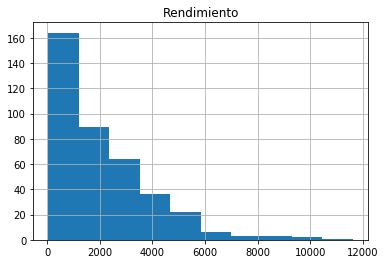

In [6]:
Respuesta=["Rendimiento"]
cacao.hist(Respuesta);

In [7]:
#Dividir el conjunto de datos entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
   
# Normalización de los atributos
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### Búsqueda de parámetros

In [8]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel lineal

svr = GridSearchCV(SVR(kernel='linear', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

In [9]:
print("Los mejores parámetros para el modelo SVM con kernel lineal son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel lineal son:


{'C': 10000.0, 'epsilon': 3.1622776601683795, 'gamma': 0.01}

In [10]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel rbf

svr = GridSearchCV(SVR(kernel='rbf', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

In [11]:
print("Los mejores parámetros para el modelo SVM con kernel rbf son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel rbf son:


{'C': 10000.0, 'epsilon': 10.0, 'gamma': 0.01}

#### Predicción modelo SVM

In [12]:
#Modelo SVM con kernel lineal

svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X_train_scaled, y_train)
y_lin = svr_lin.predict(X_train_scaled)
print(y_lin)

[2181.20012642  605.94184751 1525.17681178 2503.07289923  583.03711894
  923.33344871  863.96168494 1733.53205531 1901.82377418  378.23507529
 1976.95096309 1653.63490817  623.12039394 2146.78686687 2214.53135536
  596.20733787 1634.13318322 2648.79949637 2465.8527153  1261.39143135
 2677.48657378  415.99517178 1333.16697972 2340.50736251 1660.11755137
 1476.12326172 1466.39905046  679.24063966 1658.6199438  2256.84706707
 1510.86135642 2764.24484112 1413.13525815 1422.48099242 2287.96006701
 2169.69159544 2205.31142778 2076.09132771 1352.74094278 2268.00838384
 1999.79952498 1538.387835   2084.82672194 1510.48035458  504.58842357
 2299.50238563 2634.54020771 2065.17887598 1949.28974961 1431.07026563
 2245.01370094 2520.25144566 2136.59724205 2415.91742761 1189.81415455
 2087.63364632 1256.20516176 2194.54588454 2764.24484112 1744.11888441
 2424.50670082 2192.59632401 2299.50238563 2167.710242   2302.42164339
 1396.71317277 2129.60832044 1443.33321142 1939.20286883 3149.84043392
 2199.

In [13]:
print('Coeficientes: \n',svr_lin.coef_)

Coeficientes: 
 [[  460.47348037  1676.49904291   739.47395887 -1014.12586028
    885.0244371    538.83755418  -278.53260164 -1549.99072426
   1468.66102623]]


In [14]:
#R^2 predicción GLM con kernel lineal

r2_score(y_train,y_lin)

0.12106389998854328

In [15]:
#Modelo SVM con kernel rbf

svr_rbf = SVR(kernel='rbf', C=1e4, epsilon=1e1, gamma=0.01)
y_rbf = svr_lin.fit(X_train_scaled, y_train).predict(X_train_scaled)
print(y_rbf)

[2181.20012642  605.94184751 1525.17681178 2503.07289923  583.03711894
  923.33344871  863.96168494 1733.53205531 1901.82377418  378.23507529
 1976.95096309 1653.63490817  623.12039394 2146.78686687 2214.53135536
  596.20733787 1634.13318322 2648.79949637 2465.8527153  1261.39143135
 2677.48657378  415.99517178 1333.16697972 2340.50736251 1660.11755137
 1476.12326172 1466.39905046  679.24063966 1658.6199438  2256.84706707
 1510.86135642 2764.24484112 1413.13525815 1422.48099242 2287.96006701
 2169.69159544 2205.31142778 2076.09132771 1352.74094278 2268.00838384
 1999.79952498 1538.387835   2084.82672194 1510.48035458  504.58842357
 2299.50238563 2634.54020771 2065.17887598 1949.28974961 1431.07026563
 2245.01370094 2520.25144566 2136.59724205 2415.91742761 1189.81415455
 2087.63364632 1256.20516176 2194.54588454 2764.24484112 1744.11888441
 2424.50670082 2192.59632401 2299.50238563 2167.710242   2302.42164339
 1396.71317277 2129.60832044 1443.33321142 1939.20286883 3149.84043392
 2199.

In [16]:
#R^2 predicción GLM con kernel rbf

r2_score(y_train,y_lin)

0.12106389998854328

In [17]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1e4,1e6, 1e3]} 
svr = svm.SVR () 
reg = grid_search.GridSearchCV(svr, parameters) 
print(reg.fit(X_train_scaled, y_train)) 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [10000.0, 1000000.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [18]:
reg.best_params_

{'C': 1000000.0, 'kernel': 'linear'}

### Cross Validation

In [26]:
rkf=RepeatedKFold(n_splits=10,n_repeats=10) #la función RepeatkFolds permite crear una particion de datos y repetirla
R_2=[]
RMSE=[]
MAE=[]
for train_index, test_index in rkf.split(x):
     
    x2_train, x2_test = x.iloc[train_index], x.iloc[test_index]
    y2_train, y2_test = y.iloc[train_index], y.iloc[test_index] # Values toma la transformación de box-cox
    
    #Escalando particiòn de datos
    scaler2= preprocessing.StandardScaler().fit(x2_train)
    X2_train_scaled=scaler.transform(x2_train)
    X2_test_scaled=scaler.transform(x2_test)
 
       
    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e6, epsilon=1e1, gamma=0.01).fit(X2_train_scaled, y2_train)
    y_lin = svr_lin.predict(X2_test_scaled)
    
    R_2.append(r2_score(y2_test,y_lin))
    RMSE.append(np.linalg.norm((y2_test-y_lin),2)/np.sqrt(len(y2_test)))
    MAE.append(median_absolute_error(y2_test,y_lin))
 
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.0896
RMSE: 1735.4922
MAE: 922.3365


### Hold Out Validation

In [27]:
R_2=[]
RMSE=[]
MAE=[]
pred=[0]
obs=[0]

for i in range(20):
    x3_train,x3_test,y3_train,y3_test=train_test_split(x,y,test_size=0.2, random_state=12) #Hacer partición de datos en entrenamiento y prueba

    #Escalando particiòn de datos
    scaler3= preprocessing.StandardScaler().fit(x3_train)
    X3_train_scaled=scaler.transform(x3_train)
    X3_test_scaled=scaler.transform(x3_test)
    
    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e6, epsilon=1e1, gamma=0.01).fit(X3_train_scaled, y3_train)
    y_lin = svr_lin.predict(X3_test_scaled)
    
    r_2=r2_score(y3_test, y_lin)
    R_2.append(r_2)
    RMSE.append(np.linalg.norm((y3_test-y_lin,2)/np.sqrt(len(y3_test))))
    MAE.append(median_absolute_error(y3_test,y_lin))
    
    if r_2 >= max(R_2):
        pred[0] = y_lin
        obs[0] = y3_test
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.1534
RMSE: 144.1014
MAE: 854.4128
